# Students' performance's relation to other factors

In [17]:
# importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Importing the data from the csv file and converting it into a pandas dataframe

In [18]:
raw_data_path = os.path.join("StudentsPerformance.csv")

df = pd.read_csv(raw_data_path)

In [19]:
# looking at the dimensions of the dataframe...
df.info()

# so we have 8 features where 3 are output(target) features and 1000 rows(samples)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Renaming features for ease of access

In [63]:
df["test_prep"] = df["test preparation course"]
df["race"] = df["race/ethnicity"]
df["parent_education"] = df["parental level of education"]
df["math_score"] = df["math score"]
df["reading_score"] = df["reading score"]
df["writing_score"] = df["writing score"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   test_preparation_course      1000 non-null   object
 9   test_prep                    1000 non-null   object
 10  race                         1000 non-null   object
 11  parent_education             1000 non-null   object
 12  math_score                   1000 non-null   int64 
 13  reading_score                1000 

In [64]:
# dropping the previous columns
df.drop(["race/ethnicity", "math score", "reading score", "writing score", "test preparation course", "parental level of education"], axis = 1, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   lunch                    1000 non-null   object
 2   test_preparation_course  1000 non-null   object
 3   test_prep                1000 non-null   object
 4   race                     1000 non-null   object
 5   parent_education         1000 non-null   object
 6   math_score               1000 non-null   int64 
 7   reading_score            1000 non-null   int64 
 8   writing_score            1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


So, there are three target variables i.e, math score, reading score, writing score
And all of these target variables are mutually independent, obviously as these are separate disciplines and require separate training for good performance in the tests.

## Analysing 'math score' target variable

In [21]:
# getting the mean, median and mode of the math scores3
mean_math = df["math_score"].mean()

median_math = df["math_score"].median()

mode_math = df["math_score"].mode()

max_math = df["math_score"].max()

min_math = df["math_score"].min()

print(f"The mode is {mode_math}\nThe median is {median_math}\nThe mean is {mean_math}")
print(f"The maximum score is {max_math}\nThe minimum score is {min_math}")

The mode is 0    65
dtype: int64
The median is 66.0
The mean is 66.089
The maximum score is 100
The minimum score is 0


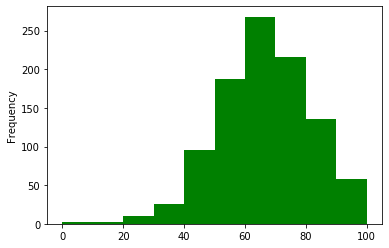

In [22]:
# using univariate analysis and visualisations on 'math score'
df["math_score"].plot(kind = "hist", color = "green")

We see that most of the students score in between 50-80.
And the outliers are beyond these values

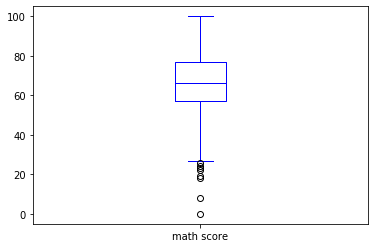

In [23]:
df["math_score"].plot(kind = "box", color = "blue")

Again, the boxplot shows us that our above conclusions are right.

In [24]:
# looking at the statistics of the 'math score'
df["math_score"].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

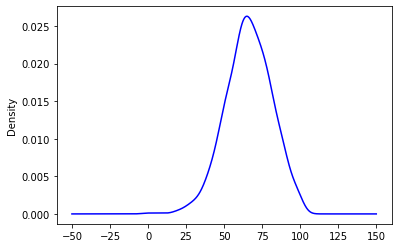

In [47]:
# kernel distribution also confirm our above hypothesis
df["math_score"].plot(kind = "kde", color = "blue")

## Analysing the 'reading score' feature

In [32]:
# getting all the statistics for 'reading score'
print(df["reading_score"].median())
print(df["reading_score"].mode())

df["reading_score"].describe()

70.0
0    72
dtype: int64


count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

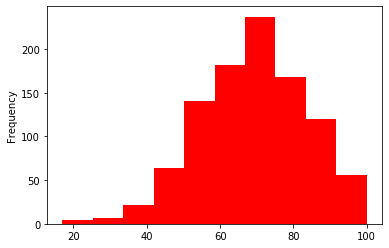

In [33]:
# using univariate graphs to analyse 'reading score'
df["reading_score"].plot(kind = "hist", color = "red")

Again, most of the students have scored between 50 - 80 from the above graph

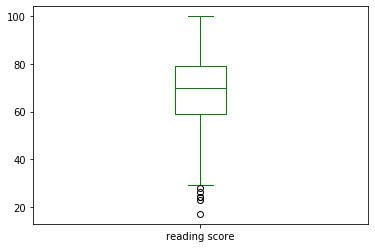

In [34]:
# box plot to analyse the outliers and quartiles
df["reading_score"].plot(kind = "box", color = "green")

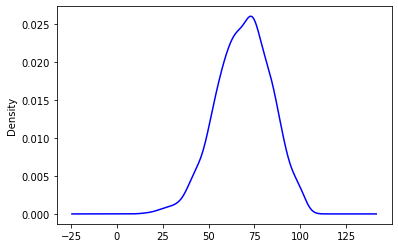

In [46]:
# the box plot also shows us that most students score between 50-80

#kde
df["reading_score"].plot(kind = "kde", color = "blue")

So we are sure that most students scored 50-80 in the reading test

## Analysing the 'writing score' feature

In [36]:
# getting all the statistics for 'writing score'
print(df["writing_score"].median())
print(df["writing_score"].mode())

df["writing_score"].describe()

69.0
0    74
dtype: int64


count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

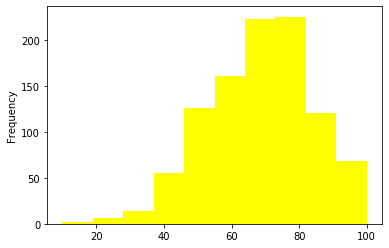

In [41]:
# using univariate graphs to analyse 'writing score'
df["writing_score"].plot(kind = "hist", color = "yellow")

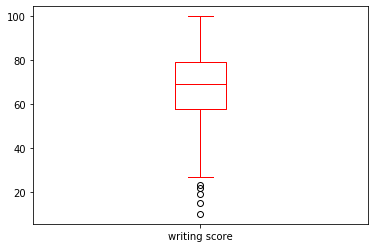

In [42]:
# box plot to analyse the outliers and quartiles
df["writing_score"].plot(kind = "box", color = "red")

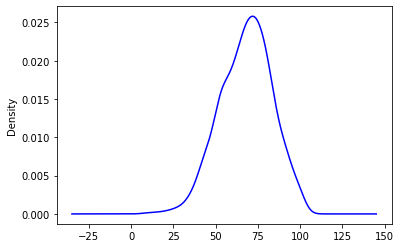

In [45]:
# the box plot also shows us that most students score between 50-90

#kde
df["writing_score"].plot(kind = "kde", color = "blue")

So we are sure that most students scored 50-90 in the writing test

## Now let's go for bi-variate graphs and visualisations,
#### First we wanna see the gender feature

### Gender

In [30]:
# the number of male and female passengers
male_passengers = df.loc[df["gender"] == "male"]
print(len(male_passengers))

female_passengers = df.loc[df["gender"] == "female"]
print(len(female_passengers))

482
518


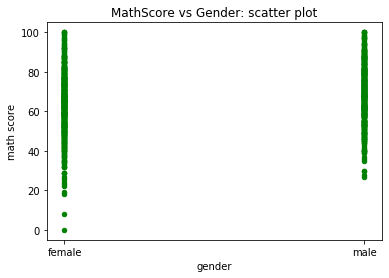

In [44]:
# scatter plot between math score and gender
df.plot.scatter(x = "gender", y = "math_score", color = "g", title = "MathScore vs Gender: scatter plot")

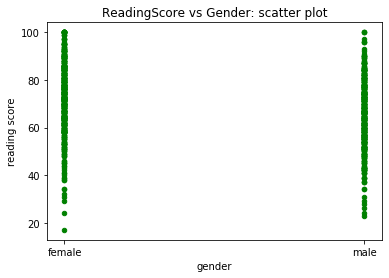

In [48]:
# scatter plot between reading score and gender
df.plot.scatter(x = "gender", y = "reading_score", color = "g", title = "ReadingScore vs Gender: scatter plot")

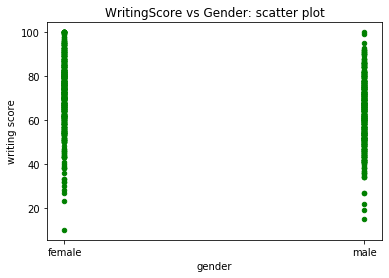

In [49]:
# scatter plot between writing score and gender
df.plot.scatter(x = "gender", y = "writing_score", color = "g", title = "WritingScore vs Gender: scatter plot")

In [69]:
# using tables to see the median score for each gender
df.groupby("gender").math_score.median()

gender
female    65
male      69
Name: math_score, dtype: int64

In [70]:
# using tables to see the median score for each gender
df.groupby("gender").reading_score.median()

gender
female    73
male      66
Name: reading_score, dtype: int64

In [71]:
# using tables to see the median score for each gender
df.groupby("gender").writing_score.median()

gender
female    74
male      64
Name: writing_score, dtype: int64

So we find that men score more in math but women scored more in reading and writing

Now we want to change the data type for easier predictions for the model,
Male = 1, Female = 0 

In [73]:
df["IsMale"] = np.where(df.gender == "male", 1, 0)

In [77]:
# now we drop the gender column...
df.drop(["gender"], axis = 1, inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   lunch                    1000 non-null   object
 1   test_preparation_course  1000 non-null   object
 2   test_prep                1000 non-null   object
 3   race                     1000 non-null   object
 4   parent_education         1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
 8   IsMale                   1000 non-null   int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 66.5+ KB


### Race

In [82]:
# lets look at the number of people of different races
df["race"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

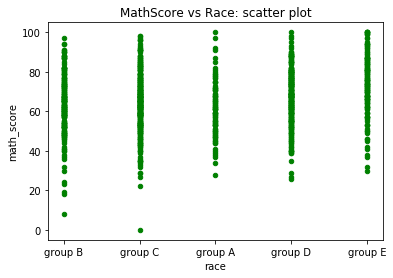

In [83]:
# scatter plot between math score and race
df.plot.scatter(x = "race", y = "math_score", color = "g", title = "MathScore vs Race: scatter plot")

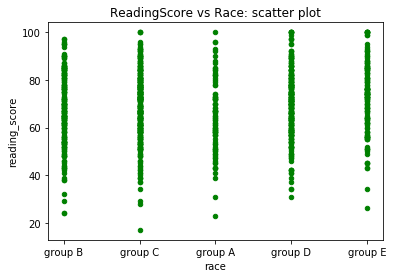

In [84]:
# scatter plot between reading score and race
df.plot.scatter(x = "race", y = "reading_score", color = "g", title = "ReadingScore vs Race: scatter plot")

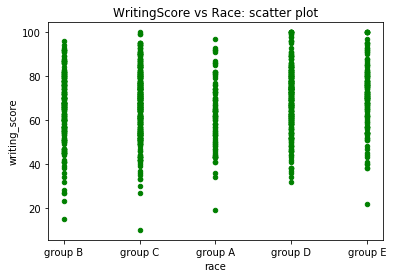

In [85]:
# scatter plot between writing score and race
df.plot.scatter(x = "race", y = "writing_score", color = "g", title = "WritingScore vs Race: scatter plot")

In [86]:
# using tables to see the median score for each race group
df.groupby("race").math_score.median()

race
group A    61.0
group B    63.0
group C    65.0
group D    69.0
group E    74.5
Name: math_score, dtype: float64

In [88]:
# using tables to see the median score for each race group
df.groupby("race").reading_score.median()

race
group A    64
group B    67
group C    71
group D    71
group E    74
Name: reading_score, dtype: int64

In [89]:
# using tables to see the median score for each race group
df.groupby("race").writing_score.median()

race
group A    62
group B    67
group C    68
group D    72
group E    72
Name: writing_score, dtype: int64

We can see that some races outperform others in every test, for instance groups D, E

We perform binning to convert this feature from object type to integer for the model to train efficiently

In [91]:
df["race_A"] = np.where(df["race"] == "group A", 1, 0)

df["race_B"] = np.where(df["race"] == "group B", 1, 0)

df["race_C"] = np.where(df["race"] == "group C", 1, 0)

df["race_D"] = np.where(df["race"] == "group D", 1, 0)

df["race_E"] = np.where(df["race"] == "group E", 1, 0)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   lunch                    1000 non-null   object
 1   test_preparation_course  1000 non-null   object
 2   test_prep                1000 non-null   object
 3   race                     1000 non-null   object
 4   parent_education         1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
 8   IsMale                   1000 non-null   int32 
 9   race_A                   1000 non-null   int32 
 10  race_B                   1000 non-null   int32 
 11  race_C                   1000 non-null   int32 
 12  race_D                   1000 non-null   int32 
 13  race_E                   1000 non-null   int32 
dtypes: int32(6), int64(3), object(5)
memory u

In [93]:
df.drop(["race"], axis = 1, inplace = True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   lunch                    1000 non-null   object
 1   test_preparation_course  1000 non-null   object
 2   test_prep                1000 non-null   object
 3   parent_education         1000 non-null   object
 4   math_score               1000 non-null   int64 
 5   reading_score            1000 non-null   int64 
 6   writing_score            1000 non-null   int64 
 7   IsMale                   1000 non-null   int32 
 8   race_A                   1000 non-null   int32 
 9   race_B                   1000 non-null   int32 
 10  race_C                   1000 non-null   int32 
 11  race_D                   1000 non-null   int32 
 12  race_E                   1000 non-null   int32 
dtypes: int32(6), int64(3), object(4)
memory usage: 78.2+ KB


### Lunch

In [96]:
# looking at the distribution of "lunch"
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

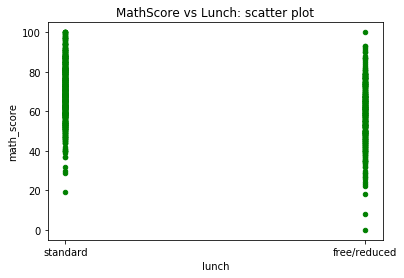

In [97]:
# scatter plot between math score and lunch type
df.plot.scatter(x = "lunch", y = "math_score", color = "g", title = "MathScore vs Lunch: scatter plot")

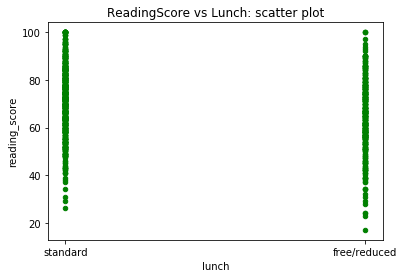

In [98]:
# scatter plot between reading score and lunch type
df.plot.scatter(x = "lunch", y = "reading_score", color = "g", title = "ReadingScore vs Lunch: scatter plot")

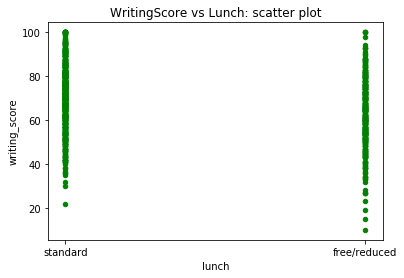

In [99]:
# scatter plot between writing score and lunch type
df.plot.scatter(x = "lunch", y = "writing_score", color = "g", title = "WritingScore vs Lunch: scatter plot")

In [100]:
# using tables to see the median score for each lunch type
df.groupby("lunch").math_score.median()

lunch
free/reduced    60
standard        69
Name: math_score, dtype: int64

In [101]:
# using tables to see the median score for each lunch type
df.groupby("lunch").reading_score.median()

lunch
free/reduced    65
standard        72
Name: reading_score, dtype: int64

In [102]:
# using tables to see the median score for each lunch type
df.groupby("lunch").writing_score.median()

lunch
free/reduced    64
standard        72
Name: writing_score, dtype: int64

It seems that the students who recieved standard lunches scored more in every test and those with free lunches scored lower marks

In [104]:
# lets create a new feature to convert the "lunch" feature to integers
df["STDlunch"] = np.where(df["lunch"] == "standard", 1, 0)

df.drop(["lunch"], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   test_preparation_course  1000 non-null   object
 1   test_prep                1000 non-null   object
 2   parent_education         1000 non-null   object
 3   math_score               1000 non-null   int64 
 4   reading_score            1000 non-null   int64 
 5   writing_score            1000 non-null   int64 
 6   IsMale                   1000 non-null   int32 
 7   race_A                   1000 non-null   int32 
 8   race_B                   1000 non-null   int32 
 9   race_C                   1000 non-null   int32 
 10  race_D                   1000 non-null   int32 
 11  race_E                   1000 non-null   int32 
 12  STDlunch                 1000 non-null   int32 
dtypes: int32(7), int64(3), object(3)
memory usage: 74.3+ KB


In [105]:
df.drop(["test_preparation_course"], axis = 1, inplace = True)

### Test_prep

In [106]:
# looking at the distribution of students who took the test prep 
df["test_prep"].value_counts()

none         642
completed    358
Name: test_prep, dtype: int64

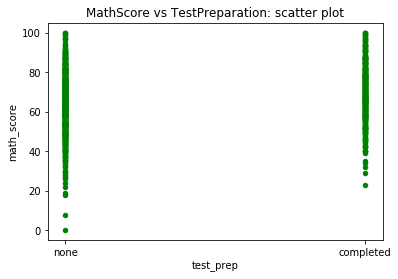

In [107]:
# scatter plot between math score and test_prep
df.plot.scatter(x = "test_prep", y = "math_score", color = "g", title = "MathScore vs TestPreparation: scatter plot")

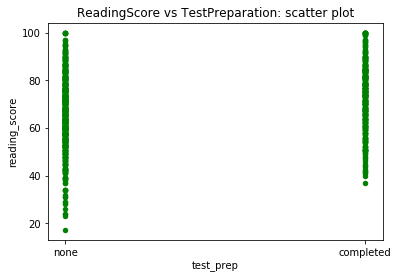

In [108]:
# scatter plot between reading score and test_prep
df.plot.scatter(x = "test_prep", y = "reading_score", color = "g", title = "ReadingScore vs TestPreparation: scatter plot")

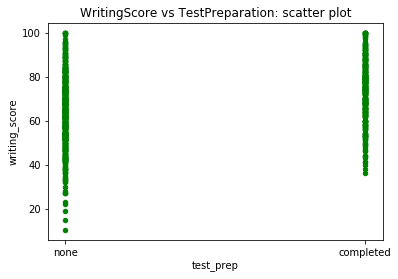

In [109]:
# scatter plot between writing score and test_prep
df.plot.scatter(x = "test_prep", y = "writing_score", color = "g", title = "WritingScore vs TestPreparation: scatter plot")

In [110]:
# using tables to see the median score for taking the test prep course
df.groupby("test_prep").math_score.median()

test_prep
completed    69
none         64
Name: math_score, dtype: int64

In [111]:
# using tables to see the median score for taking the test prep course
df.groupby("test_prep").reading_score.median()

test_prep
completed    75
none         67
Name: reading_score, dtype: int64

In [112]:
# using tables to see the median score for taking the test prep course
df.groupby("test_prep").writing_score.median()

test_prep
completed    76
none         65
Name: writing_score, dtype: int64

So we see that taking the test preparation course is making a difference in scores 

The students who took the test are scoring HIGHER scores.

In [114]:
# now we wanna convert the object data type to integer type 
df["test_taken"] = np.where(df["test_prep"] == "completed", 1, 0)

df.drop(["test_prep"], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   parent_education  1000 non-null   object
 1   math_score        1000 non-null   int64 
 2   reading_score     1000 non-null   int64 
 3   writing_score     1000 non-null   int64 
 4   IsMale            1000 non-null   int32 
 5   race_A            1000 non-null   int32 
 6   race_B            1000 non-null   int32 
 7   race_C            1000 non-null   int32 
 8   race_D            1000 non-null   int32 
 9   race_E            1000 non-null   int32 
 10  STDlunch          1000 non-null   int32 
 11  test_taken        1000 non-null   int32 
dtypes: int32(8), int64(3), object(1)
memory usage: 62.6+ KB


### Parental Education

In [115]:
# getting the numbers distribution for the parental education feature
df["parent_education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education, dtype: int64

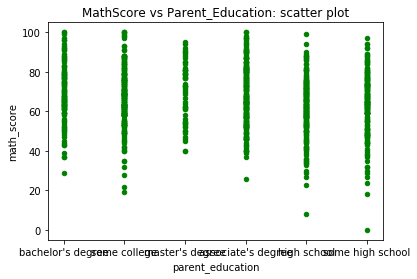

In [116]:
# scatter plot between math score and parent_education
df.plot.scatter(x = "parent_education", y = "math_score", color = "g", title = "MathScore vs Parent_Education: scatter plot")

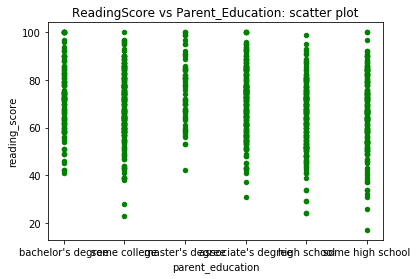

In [119]:
# scatter plot between reading score and parent_education
df.plot.scatter(x = "parent_education", y = "reading_score", color = "g", title = "ReadingScore vs Parent_Education: scatter plot")

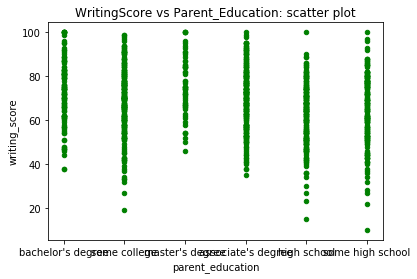

In [120]:
# scatter plot between writing score and parent_education
df.plot.scatter(x = "parent_education", y = "writing_score", color = "g", title = "WritingScore vs Parent_Education: scatter plot")

In [121]:
# using tables to see the median score for the parent's education
df.groupby("parent_education").math_score.median()

parent_education
associate's degree    67.0
bachelor's degree     68.0
high school           63.0
master's degree       73.0
some college          67.5
some high school      65.0
Name: math_score, dtype: float64

In [122]:
# using tables to see the median score for the parent's education
df.groupby("parent_education").reading_score.median()

parent_education
associate's degree    72.5
bachelor's degree     73.0
high school           66.0
master's degree       76.0
some college          70.5
some high school      67.0
Name: reading_score, dtype: float64

In [123]:
# using tables to see the median score for the parent's education
df.groupby("parent_education").writing_score.median()

parent_education
associate's degree    70.5
bachelor's degree     74.0
high school           64.0
master's degree       75.0
some college          70.0
some high school      66.0
Name: writing_score, dtype: float64

So the students having parents with associate's, bachelor's, master's degrees score MORE than the students with parents having a lesser degree.

Students having parents with high school degree score less than other students.

Now we bin the 'parent_education' feature.

In [124]:
df["parent_associate_deg"] = np.where(df["parent_education"] == "associate's degree", 1, 0)

df["parent_bachelor_deg"] = np.where(df["parent_education"] == "bachelor's degree", 1, 0)

df["parent_master_deg"] = np.where(df["parent_education"] == "master's degree", 1, 0)

df["parent_high_school"] = np.where(df["parent_education"] == "high school", 1, 0)

df["parent_some_school"] = np.where(df["parent_education"] == "some high school", 1, 0)

df["parent_some_college"] = np.where(df["parent_education"] == "some college", 1, 0)


df.drop(["parent_education"], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   math_score            1000 non-null   int64
 1   reading_score         1000 non-null   int64
 2   writing_score         1000 non-null   int64
 3   IsMale                1000 non-null   int32
 4   race_A                1000 non-null   int32
 5   race_B                1000 non-null   int32
 6   race_C                1000 non-null   int32
 7   race_D                1000 non-null   int32
 8   race_E                1000 non-null   int32
 9   STDlunch              1000 non-null   int32
 10  test_taken            1000 non-null   int32
 11  parent_associate_deg  1000 non-null   int32
 12  parent_bachelor_deg   1000 non-null   int32
 13  parent_master_deg     1000 non-null   int32
 14  parent_high_school    1000 non-null   int32
 15  parent_some_school    1000 non-null   int32
 16  parent_

## Converting the processed dataframe to a .csv file

In [125]:
df.to_csv("Processed_Data.csv", index = True)

We convert the object data type to integer/float data type in order to help the MODEL train and make predictions.